# 1 и 2 задания

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
path: str = './data/titanic_train.csv'
df: pd.DataFrame = pd.read_csv(path)


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3 задание

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


В данных присутствуют пропуски


# 4 задание

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Задание 6
## Заполнение пропусков

Выявление количество пропусков

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Столбец age будет заполнен медианным значением, так как тип данных числовой и обозначает возраст пассажира 

Столбец Embraked будет заполнен частовстречаемым значением, так как представляет собой объект и в последующем будет закодирован

Столбец Cabin будет удален, так как содержит меньше половины данных

Заполнение Age

In [8]:
df.Age = df.Age.fillna(df.Age.median())


Заполнение Embraked

In [9]:
df.Embarked.value_counts()
df.Embarked = df.Embarked.fillna(df.Embarked.values[0])
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Удаление данных

Удаление Cabin

In [10]:
df.drop(columns=['Cabin'],index=1, inplace=True)


In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Удалим PassengerId, так как это является технической информацией

In [12]:
df.drop(columns=['PassengerId'],index=0, inplace=True)

In [13]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Проверим значение полей Name и Ticket

In [14]:
df.Name.value_counts(), df.Ticket.value_counts(), df.count()

(Heikkinen, Miss. Laina                          1
 Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")    1
 Gilinski, Mr. Eliezer                           1
 Murdlin, Mr. Joseph                             1
 Rintamaki, Mr. Matti                            1
                                                ..
 Johnson, Mr. William Cahoone Jr                 1
 Keane, Miss. Nora A                             1
 Williams, Mr. Howard Hugh "Harry"               1
 Allison, Master. Hudson Trevor                  1
 Dooley, Mr. Patrick                             1
 Name: Name, Length: 889, dtype: int64,
 CA. 2343    7
 1601        7
 347082      7
 347088      6
 3101295     6
            ..
 9234        1
 19988       1
 2693        1
 PC 17612    1
 370376      1
 Name: Ticket, Length: 679, dtype: int64,
 Survived    889
 Pclass      889
 Name        889
 Sex         889
 Age         889
 SibSp       889
 Parch       889
 Ticket      889
 Fare        889
 Embarked    889
 dtype: int64)

Так как количество имен равно количеству записей, а количество билетов очень близко к нему, можно сделать вывод, что это уникальне поля и удалить их

In [15]:
df.drop('Name',axis=1, inplace=True)
df.drop('Ticket',axis=1, inplace=True)

## Кодирование данных

Значение поля sex может иметь значение, по этому закодируем его, используя словарь

In [16]:
sex_dictionary = {
    "male": 0,
    "female": 1
}

In [17]:
df.Sex = df.Sex.map(sex_dictionary)

In [18]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
5,0,3,0,28.0,0,0,8.4583,Q
6,0,1,0,54.0,0,0,51.8625,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,28.0,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


Закодируем значение поля Embarked
Для выбора способа кодировке, посмотрим на значения 

In [19]:
df.Embarked.value_counts()

S    645
C    167
Q     77
Name: Embarked, dtype: int64

Так как значений немного и мне трудно предположить, насколько оно должно будет быть обратнорасшифровываемым, будет использован метод кодирования словарем

In [20]:
embarked_dictionary = {
    'S': 0,
    'C': 1,
    'Q': 2
}

In [21]:
df.Embarked = df.Embarked.map(embarked_dictionary)

In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,28.0,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,28.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


# Задание 7

In [23]:
df.Sex.value_counts()

0    576
1    313
Name: Sex, dtype: int64

# Задание 8

c:\Users\VPR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(3    490
 1    215
 2    184
 Name: Pclass, dtype: int64,
 <AxesSubplot:xlabel='Pclass', ylabel='count'>)

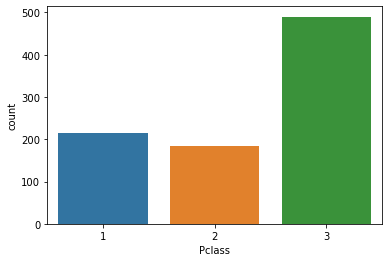

In [24]:
df.Pclass.value_counts(), sb.countplot(df.Pclass)

c:\Users\VPR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

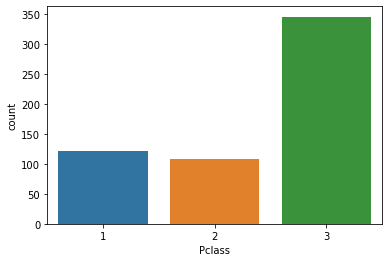

In [25]:
df[df.Sex == 0].Pclass.value_counts(),
sb.countplot(df[df.Sex == 0].Pclass)

c:\Users\VPR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

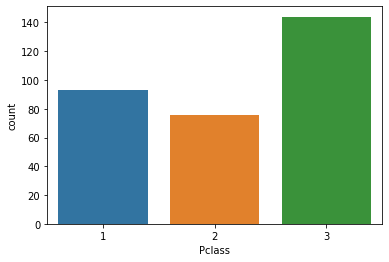

In [26]:
df[df.Sex == 1].Pclass.value_counts(),
sb.countplot(df[df.Sex == 1].Pclass)

c:\Users\VPR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

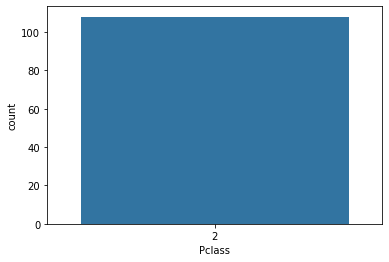

In [27]:
df[(df.Sex == 0) & (df.Pclass == 2)].Pclass.value_counts(),
sb.countplot(df[(df.Sex == 0) & (df.Pclass == 2)].Pclass)

# Задание 9

In [28]:
round(df.Fare.median(), 2)


14.45

In [29]:
round(df.Fare.std(), 2)

49.73

# Задание 10

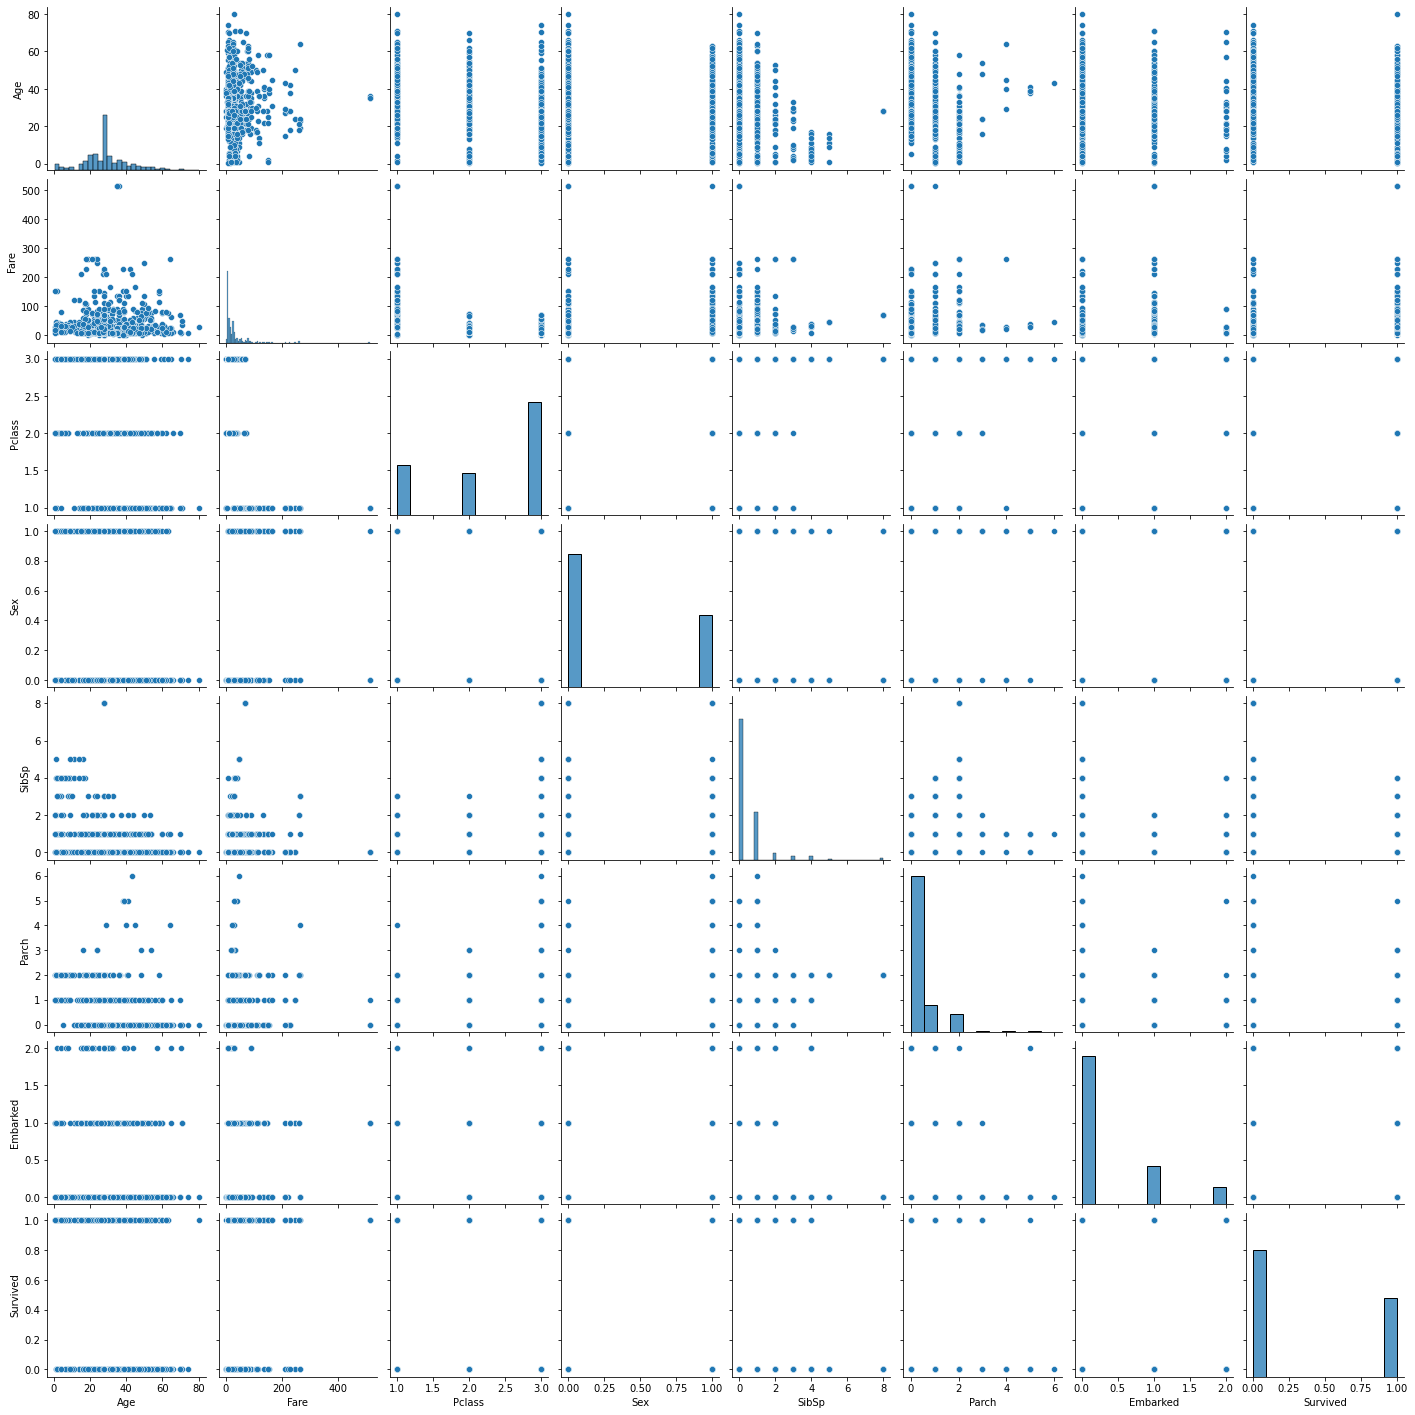

In [30]:
sb.pairplot(df[['Age', 'Fare', 'Pclass', 'Sex',
            'SibSp', 'Parch', 'Embarked', 'Survived']])


# Задание 11

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Embarked'}>, <AxesSubplot:>]],
      dtype=object)

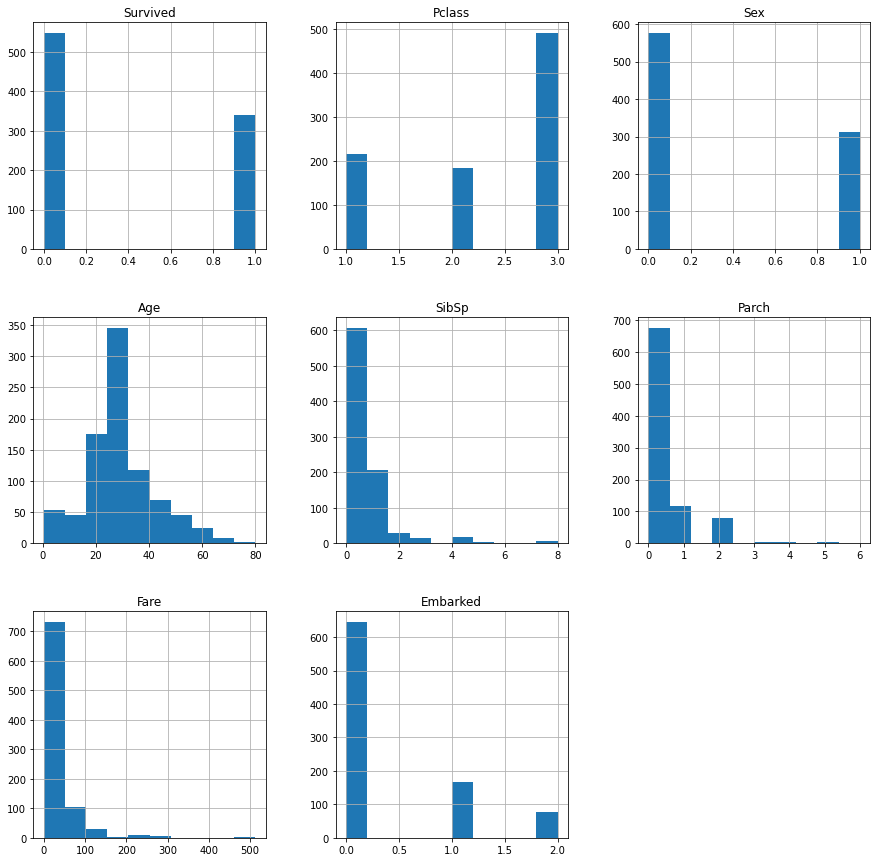

In [31]:
df.hist(figsize=(15,15))

Большинство пасажиров умерло
Преобладал третий класс и платили до 50 уе за билет
В основном пассажирам было от 18 до 40 лет
С пассажиром был 1 родственник


<AxesSubplot:>

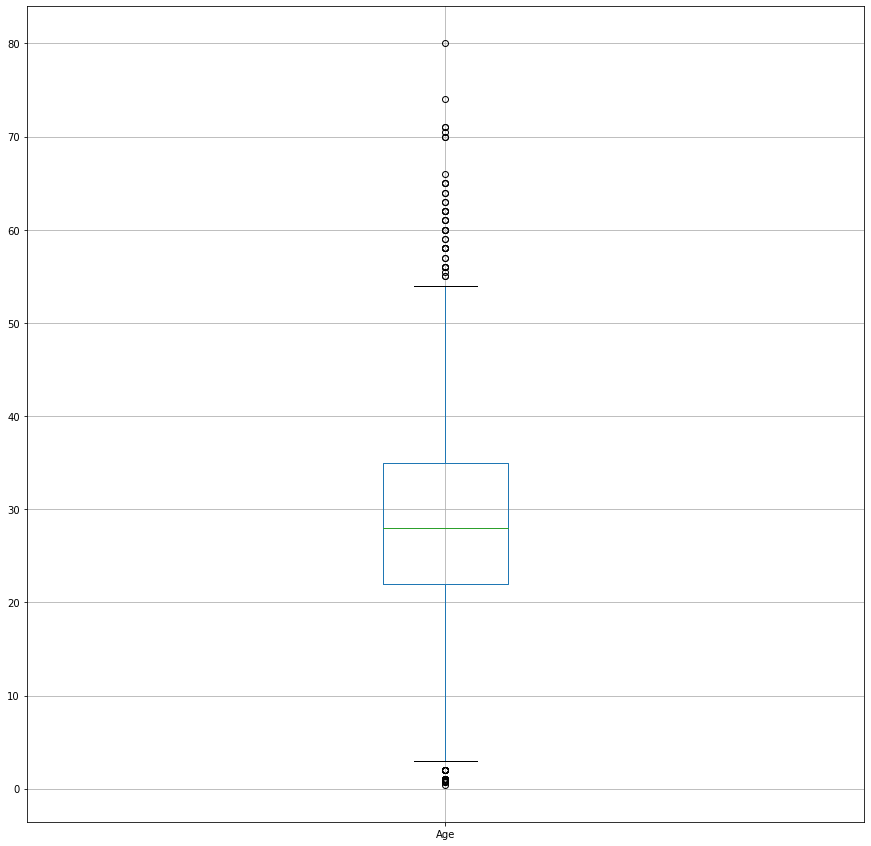

In [32]:
df.boxplot(figsize=(15, 15), column=['Age'])

Средний пассажир - мужчина 28 лет, едущий в третьем класса

<AxesSubplot:>

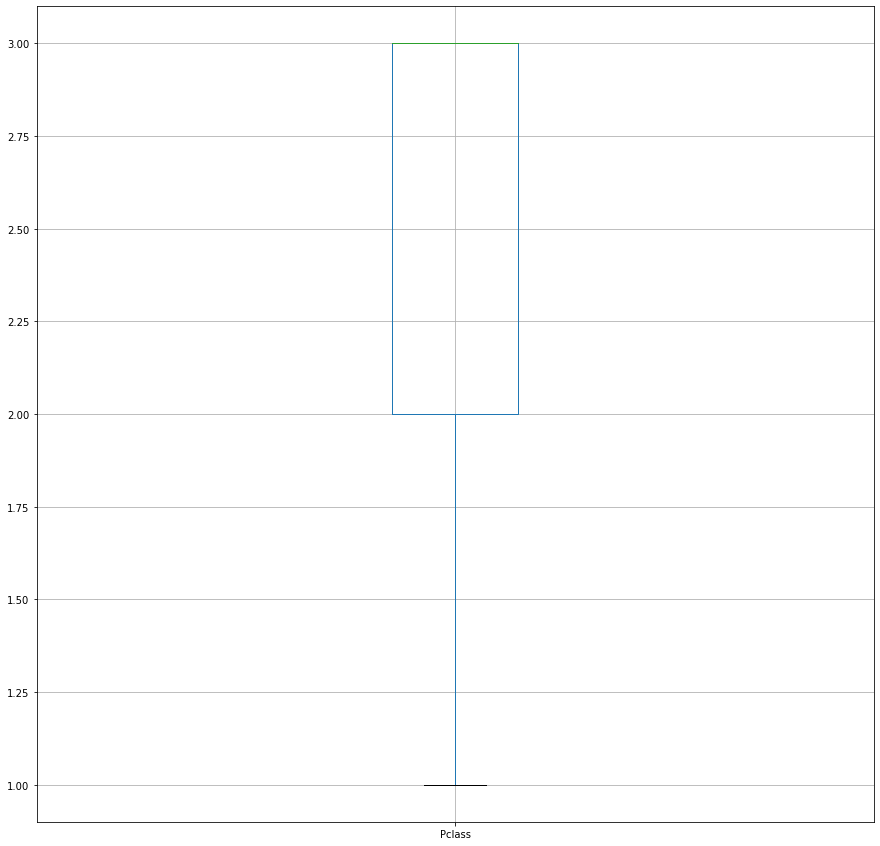

In [33]:
df.boxplot(figsize=(15, 15), column=['Pclass'])

# Задание 12

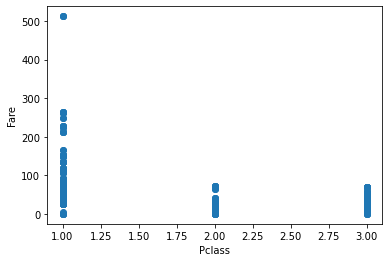

In [34]:
mpl.ylabel('Fare')
mpl.xlabel('Pclass')
mpl.scatter(df.Pclass, df.Fare)

Цена билета напрямую зависит от типа каюты

Но между первым и вторым классом различия минимальны

<AxesSubplot:>

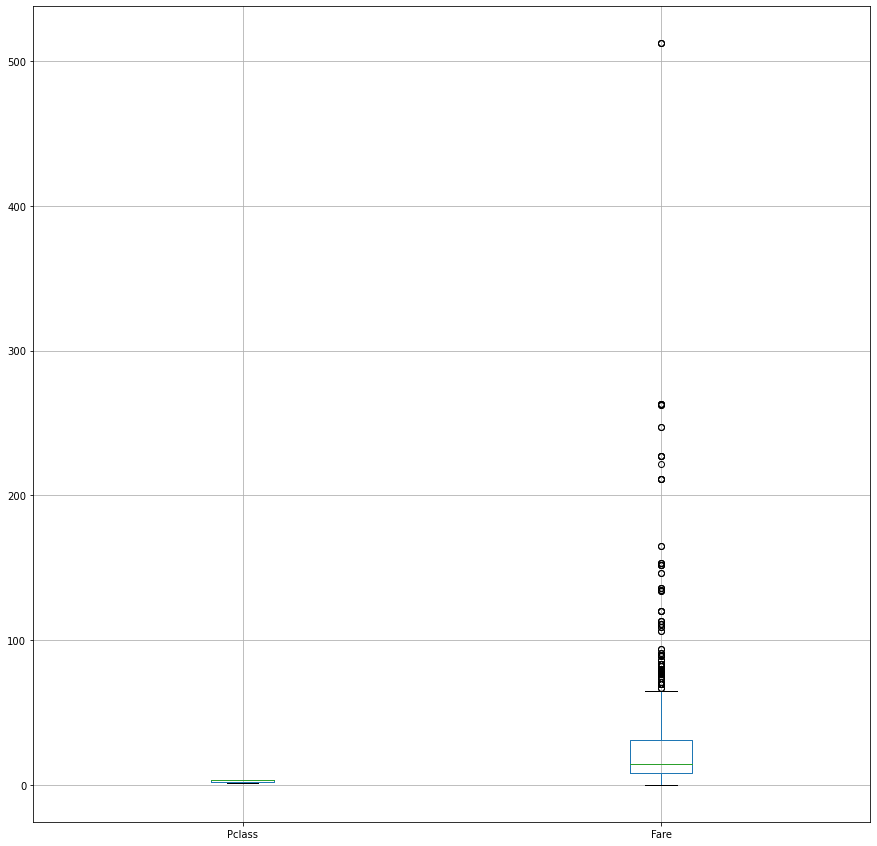

In [35]:
df.boxplot(figsize=(15, 15), column=['Pclass', 'Fare'])

# Задание 13

In [36]:
survivedDictionary = {
    1: 'Yes',
    0: 'No'
}

<AxesSubplot:xlabel='Survived', ylabel='count'>

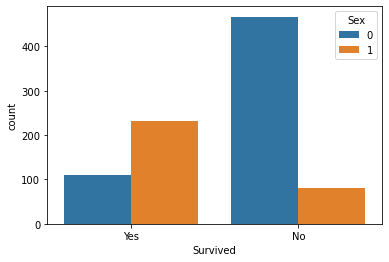

In [37]:
sb.countplot(hue=df['Sex'],x=df['Survived'].map(survivedDictionary))

Среди вижевших больше всего женшин, что может быть связано с традицией эвакуировать их раньше мужчин

# Задание 14

<AxesSubplot:xlabel='Survived', ylabel='count'>

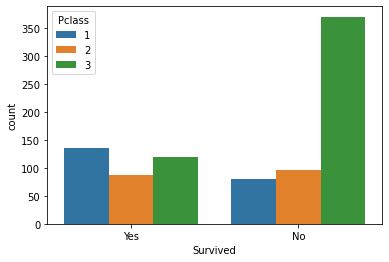

In [38]:
sb.countplot(hue=df['Pclass'],x=df['Survived'].map(survivedDictionary))

Большиство пассажиров третьего класса погибли

# Задание 15

Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет. 

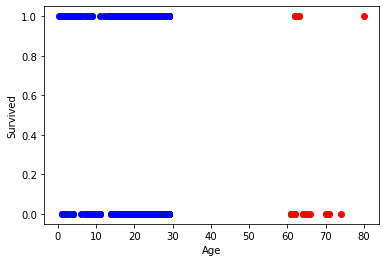

In [39]:
mpl.ylabel('Survived')
mpl.xlabel('Age')
mpl.scatter(df[df['Age'] < 30].Age, df[df['Age'] < 30].Survived, c='blue')
mpl.scatter(df[df['Age'] > 60].Age, df[df['Age'] > 60].Survived, c='red')

Гипотеза верна, молодые умирали чуть реже, чем старые

# Задание 16

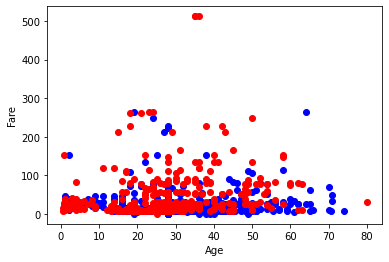

In [40]:
mpl.ylabel('Fare')
mpl.xlabel('Age')
mpl.scatter(df[df.Survived == 0].Age, df[df.Survived == 0].Fare, c='blue')
mpl.scatter(df[df.Survived == 1].Age, df[df.Survived == 1].Fare, c='red')

На графике можно увидеть, что молодые умирали чуть реже
Цена билета увеличивала шан выживания

Зависящими признаками, будут признаки с кореляцией больше 0.2 по модулю

<AxesSubplot:>

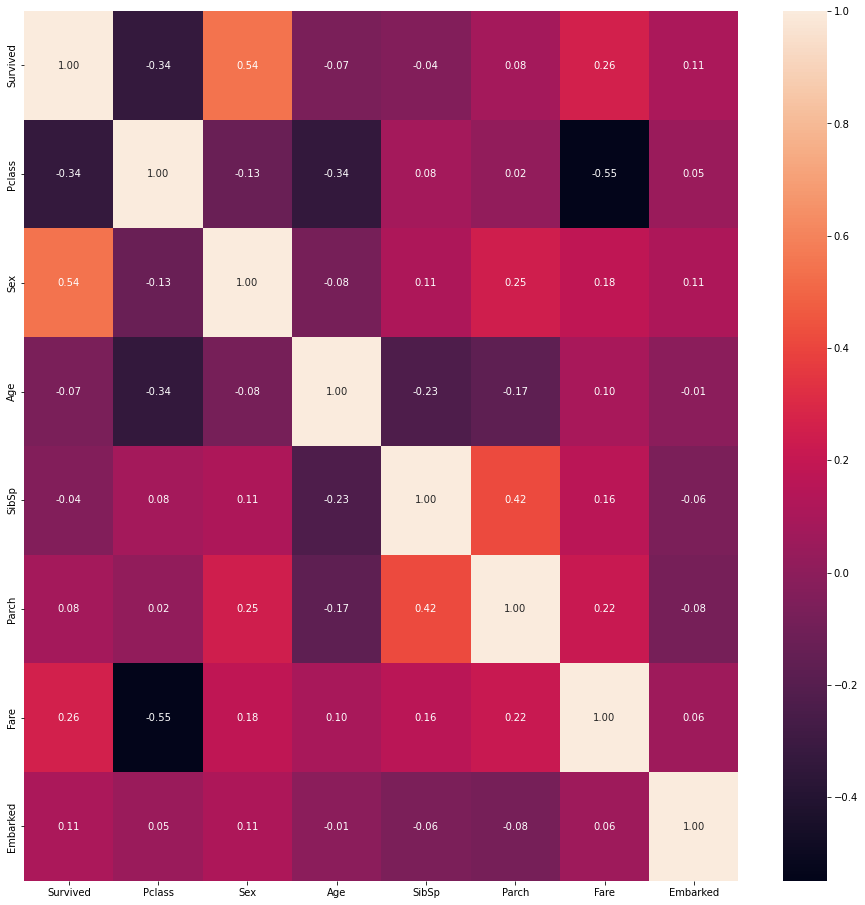

In [41]:
mpl.figure(figsize = (16, 16))
sb.heatmap(df.corr(), annot=True, fmt='.2f')

Из графика видно, что Survived зависит от полей Fare, Sex и Pclass

In [42]:
df = df[['Fare', 'Sex', 'Pclass', 'Survived']]

# Масштабирование

Так как планируется использование метода К ближайших соседей, то на всякий случай отмаштабируем данные

In [43]:
scal = StandardScaler()
df_scal = scal.fit_transform(df.drop('Survived', axis=1))

In [44]:
df_scal

array([[-0.48822461,  1.35656021,  0.82707575],
       [ 0.4207832 ,  1.35656021, -1.56794164],
       [-0.48570937, -0.73715858,  0.82707575],
       ...,
       [-0.17583178,  1.35656021,  0.82707575],
       [-0.04403319, -0.73715858, -1.56794164],
       [-0.49174595, -0.73715858,  0.82707575]])

# Разбиение данных

In [45]:
df.Survived.value_counts()

0    548
1    341
Name: Survived, dtype: int64

c:\Users\VPR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

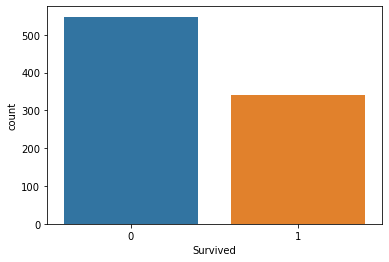

In [46]:
sb.countplot(df.Survived)

Выборку трудно назвать сбалансированной, по этому мы будем использовать не случайное разбиение с выравниванием по целевой переменной

In [47]:
y = df.Survived
x = df_scal.copy()

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

# Обучение моделей

## Дерево решений

Для начало попробуем использовать дерево решений

In [49]:
decision_tree = DecisionTreeClassifier()

In [50]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

Смотрим то, насколько точно предсказывает модель 

In [51]:
y_predicated = decision_tree.predict(x_test)
accuracy_score(y_test, y_predicated)

0.8089887640449438

Точно можно назвать хорошой

In [52]:
y_predicated[0:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

В первых 20 значениях отсутствуют значения, что не должны быть в ответе

Посмотрим то, насколько много ошибок допустила модель

In [53]:
def confuse(y_test, y_predicated):
    sb.heatmap(confusion_matrix(y_test, y_predicated), annot=True, fmt='.0f')


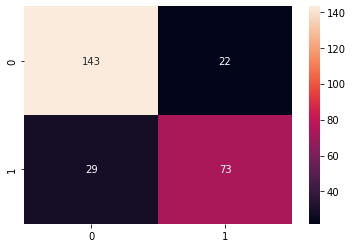

In [54]:
confuse(y_test, y_predicated)

Попробуем поколдовать с гиперпараметрами

In [55]:
decision_tree = DecisionTreeClassifier(random_state=1)

In [56]:
params = {
    "max_depth": np.arange(1, 8, 1),
    "min_samples_leaf": range(1, 6, 1)
}

grid = GridSearchCV(decision_tree, params, cv=5, n_jobs=-1)

In [57]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': range(1, 6)})

In [58]:
decision_tree = grid.best_estimator_

In [59]:
y_predicated = decision_tree.predict(x_test)
accuracy_score(y_test, y_predicated)

0.8014981273408239

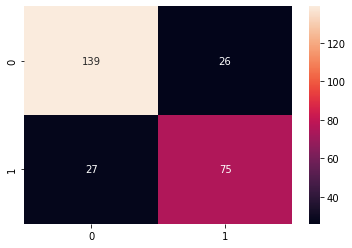

In [60]:
confuse(y_test, y_predicated)

Результат оказался хуже

## К ближайших соседей

Попробуем следующую модель

In [61]:
np.random.seed(1)
k_neighbors = KNeighborsClassifier(n_neighbors=12)

Количество соседей берется по моему ощущению

In [62]:
k_neighbors.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [63]:
y_predicated = k_neighbors.predict(x_test)
accuracy_score(y_test, y_predicated)

0.8052434456928839

In [64]:
y_predicated[0:20]

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

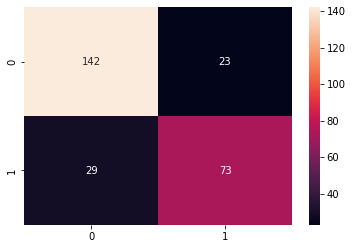

In [65]:
confuse(y_test, y_predicated)

Неверных значений не видно

Данная модель имеет на одну ошибку больше, чем предыдущая, что можно считать погрешностью и сказать, что модели предсказывают примерно одинаково

Попробуем пободрать гиперпараметры

In [66]:
k_neighbors = KNeighborsClassifier()

In [67]:
params = {
   "n_neighbors" : np.arange(1, 25, 1),
   "leaf_size": range(1, 6, 1)
}
grid = GridSearchCV(k_neighbors, params, cv=6, n_jobs=-1)

In [68]:
grid.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': range(1, 6),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [69]:
k_neighbors = grid.best_estimator_

In [70]:
y_predicated = k_neighbors.predict(x_test)
accuracy_score(y_test, y_predicated)

0.8164794007490637

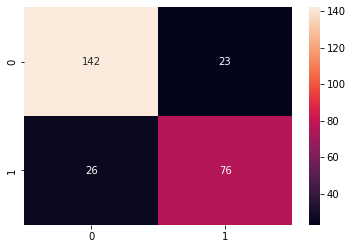

In [71]:
confuse(y_test, y_predicated)

Это не дало какого либо результата

## Случайный лей

In [72]:
random_forest = RandomForestClassifier(n_estimators=300, random_state=1)

In [73]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=1)

In [74]:
y_predicated = random_forest.predict(x_test)
accuracy_score(y_test, y_predicated)

0.8164794007490637

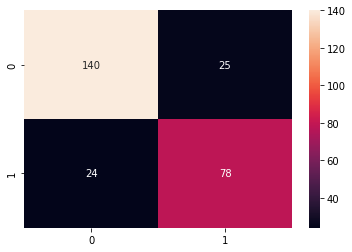

In [75]:
confuse(y_test, y_predicated)

Данная модель имеет большую точнось

Но если взглянуть на график, то можно увидеть, что модель чуть менее точно предсказывает смерть, и чуть более хорошо предсказывает жизнь

Подберем гиперпараметры

In [76]:
random_forest = RandomForestClassifier(random_state=1)

In [77]:
params = {
    "n_estimators": np.arange(200, 500, 10)
}
grid = GridSearchCV(random_forest, params, cv=5, n_jobs=-1)

In [78]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'n_estimators': array([200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320,
       330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450,
       460, 470, 480, 490])})

In [79]:
random_forest = grid.best_estimator_

In [80]:
y_predicated = random_forest.predict(x_test)
accuracy_score(y_test, y_predicated)

0.8164794007490637

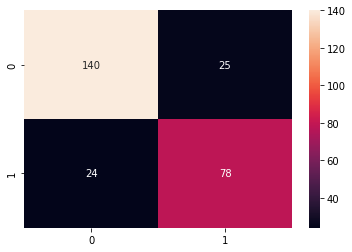

In [81]:
confuse(y_test, y_predicated)

Подбро гиперпараметров не дал никааких результатов

In [82]:
import joblib 

In [83]:
joblib.dump(random_forest, "./models/titanic.pkl")

['./models/titanic.pkl']

# Итог

Для предссказаний можно брать любую из трех моделей, так как они предсказывают примерно одинаково

Если вам нужно лучше предсказывать выживших, то можно обратить внимание на случайный лес

Если нужно предсказывать умерших, то можно обратить внимание на дерево решений